# ---------------------: Logistic Regression : Attrition Dataset :---------------------------

### Importing libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In [166]:
data=pd.read_csv("D:/Emerson/LU_AI_ML/project/Day_21/general_data.csv")

In [167]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [168]:
data.shape

(4410, 24)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [170]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [171]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [172]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [173]:
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(round(data['TotalWorkingYears'].mean(),2)) 
# 11.28 is the mean of TotalWorkingYears column 

data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(round(data['NumCompaniesWorked'].mean(),2))
# 2 is the median of NumCompaniesWorked

In [174]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

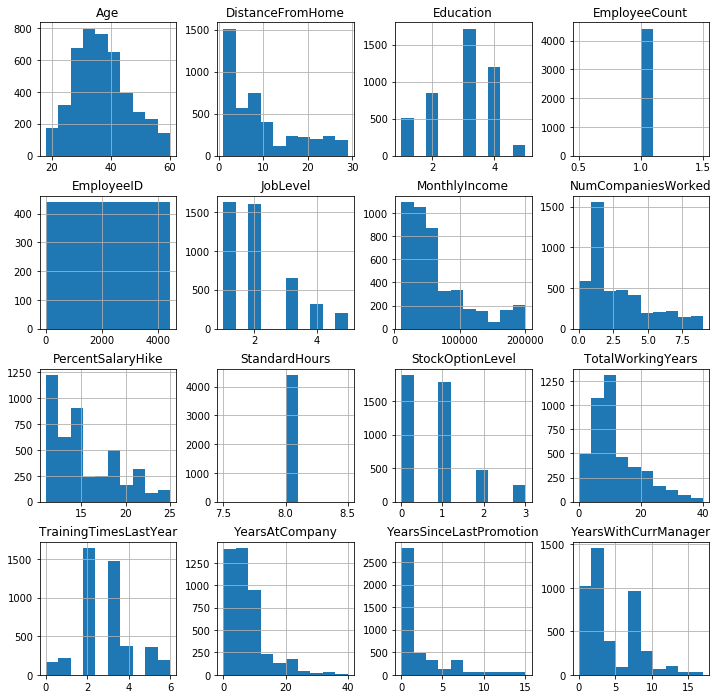

In [175]:
data.hist(figsize=(12,12))
plt.show()

###### Inference from Histogram:
    Education, JobLevel, StockOptional Level are Categorical Variables which are in Encoded format
    Standard Hours, Employee Count, Employee ID are irrelevent columns

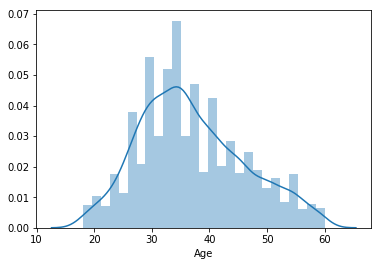

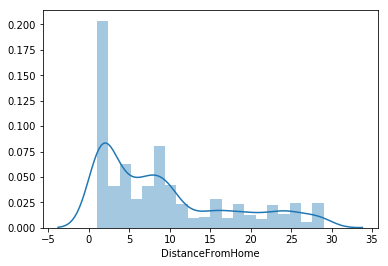

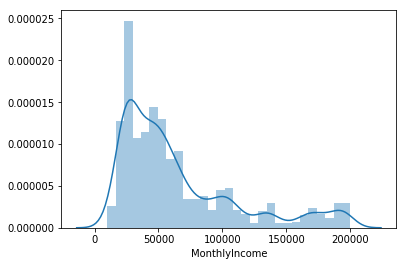

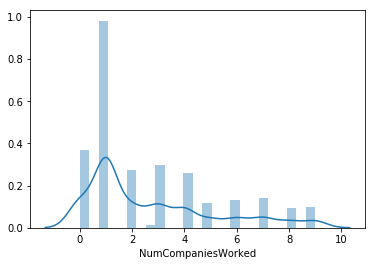

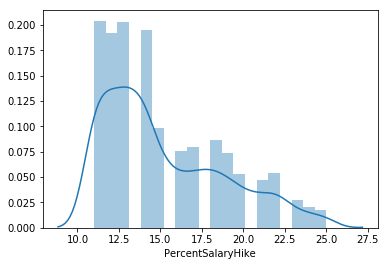

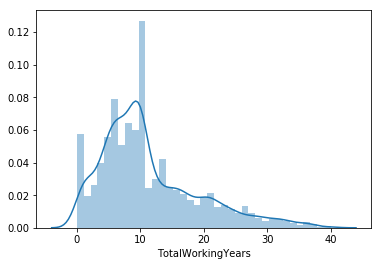

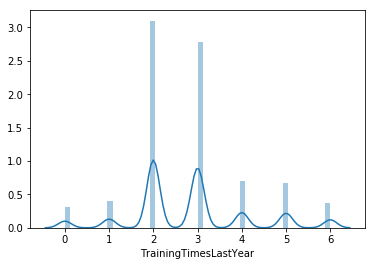

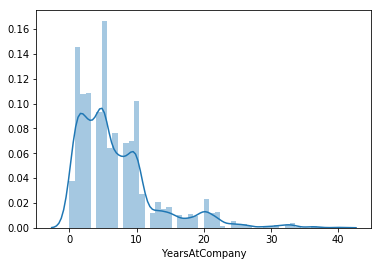

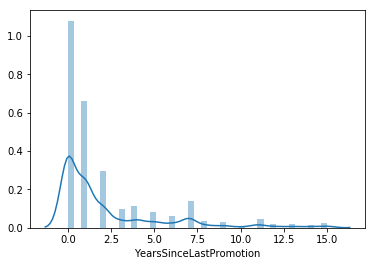

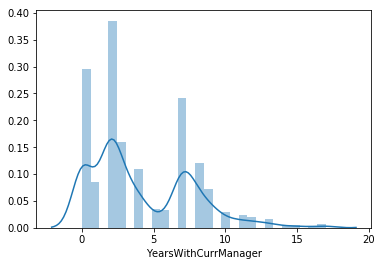

In [176]:
columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns:
    sns.distplot(data[col])
    plt.show()

###### Inference from Distplot
    Age, NumCompanies Worked, PercentSalaryHike, TotalWorking Years, YearsSinceLastPromotion is Unimodal
    Distance from Home is Bimodal
    Monthly Income, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal

### Finding Outliers using Boxplot

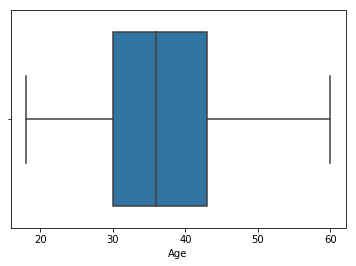

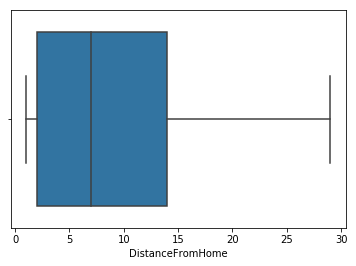

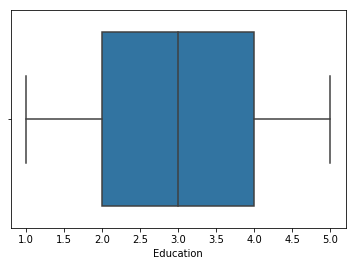

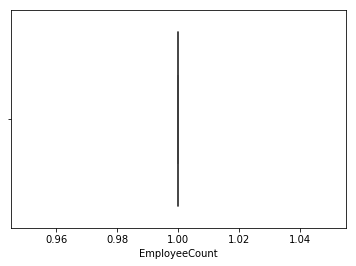

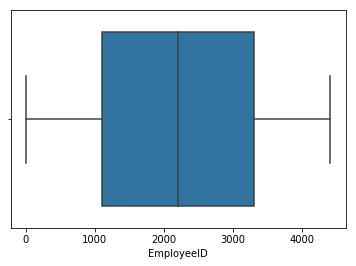

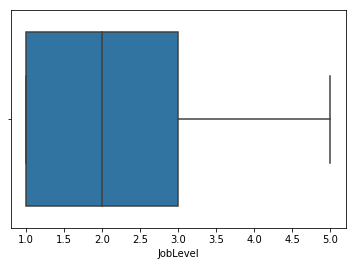

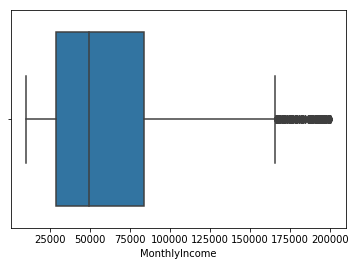

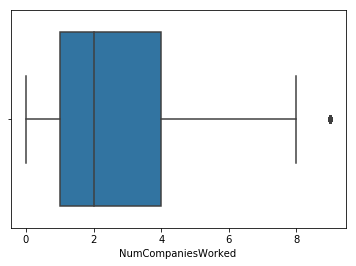

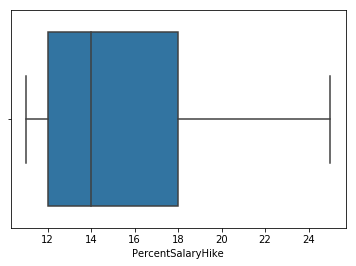

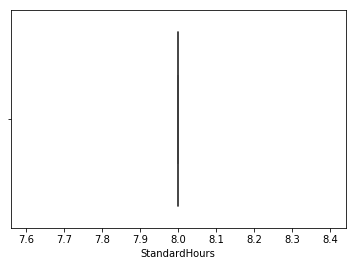

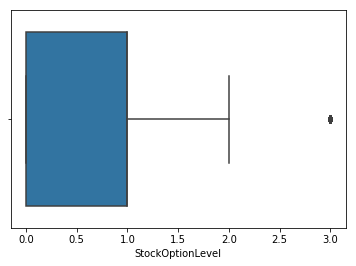

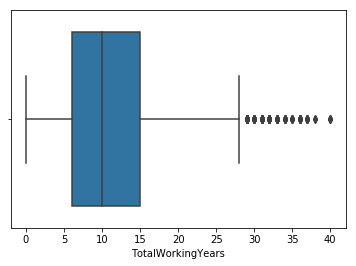

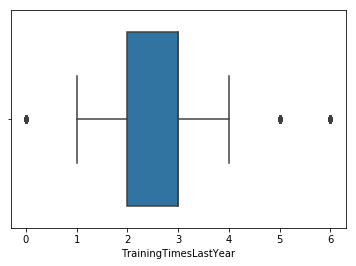

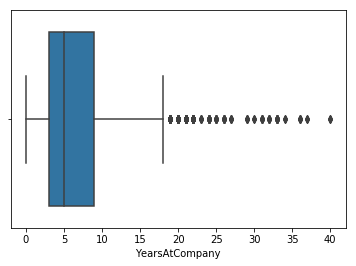

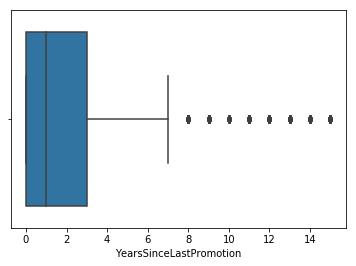

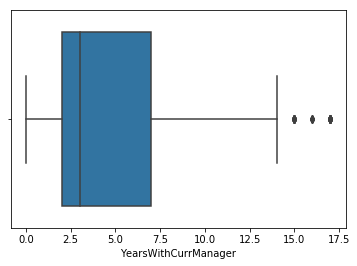

In [177]:
col = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in col:
    sns.boxplot(data[i])
    plt.show()

### Inference from BoxPlots
Ploted Box Plot for all the Continous Variable ( int and float not object type variable)

    Age, DistanceFromHome, Education, EmployeeID, JobLevel, PercentSalaryHike : Donot have any outlier
    NumCompaniesWorked, StockOptionLevel has Single Outlier
    MonthlyIncome has Many Outliers
    TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have Moderate Outliers
    TrainingTimesLastYear, YearsWithCurrManager : Have Some Outliers
    EmployeeCount

### Converting Text Column to Categorical Form

In [178]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

data['Attrition'] = lab.fit_transform(data['Attrition'])
data['BusinessTravel'] = lab.fit_transform(data['BusinessTravel'])
data['Department'] = lab.fit_transform(data['Department'])
data['Over18'] = lab.fit_transform(data['Over18'])
data['MaritalStatus'] = lab.fit_transform(data['MaritalStatus'])
data['JobRole'] = lab.fit_transform(data['JobRole'])
data['Gender'] = lab.fit_transform(data['Gender'])
data['EducationField'] = lab.fit_transform(data['EducationField'])

In [179]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [180]:
data = data.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'],axis=1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [181]:
data.shape

(4410, 20)

### Spliting the Dataset

In [182]:
y = data.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [183]:
x = data.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [184]:
data.shape

(4410, 20)

### Apply Logistic Regression
    Target Variable is Attrition which is Binary Categorical ( 0 or 1 )

In [185]:
import statsmodels.api as sm

In [195]:
x1 = sm.add_constant(x)
x1.head()

,const,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,1.0,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,1.0,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,1.0,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,1.0,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [194]:
logistic = sm.Logit(y,x1)

In [196]:
x1.shape

(4410, 20)

In [197]:
y.shape

(4410, 1)

In [198]:
x.shape

(4410, 19)

In [188]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393016
         Iterations 7


In [189]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Sat, 15 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        23:20:38   Log-Likelihood:                -1733.2
converged:                       True   LL-Null:                       -1947.9
                                        LLR p-value:                 3.382e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0759      0.414      0.183      0.854      -0.735       0.887
Age                        -0.0309      0.007     -4.524      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.270      0.787      -0.146       0.111
Department                 -0.2423      0.081     -2.981      0.003      -0.402      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0628      0.043     -1.473      0.141      -0.146       0.021
EducationField             -0.0966      0.033     -2.894      0.004      -0.162      -0.031
Gender                      0.0860      0.090      0.961      0.337      -0.089       0.262
JobLevel                   -0.0241      0.040     -0.608      0.543      -0.102       0.054
JobRole                     0.0377      0.018      2.108      0.035       0.003       0.073
MaritalStatus               0.5887      0.063      9.323      0.000       0.465       0.712
MonthlyIncome           -1.874e-06   9.56e-07     -1.961      0.050   -3.75e-06   -6.89e-10
NumCompaniesWorked          0.1163      0.018      6.338      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.005      0.315      -0.011       0.035
StockOptionLevel           -0.0639      0.052     -1.238      0.216      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.819      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.171      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.656      0.512      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.459      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.308      0.000      -0.183      -0.096
===========================================================================================
"""

### Inference from Logistic Regression
##### Not Significantly Important Columns ( p value > 0.05 )
    BusinessTravel, DistanceFromHome, Education, Gender, JobLevel, PercentSalaryHike, StockOptionLevel, YearsAtCompany
##### Most Significantly Important Columns ( p value < 0.05 )
    Age, Department, EducationField, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked,  YearsWithCurrManager ,             TotalWorkingYears,TrainingTimesLastYear, YearsSinceLastPromotion
   
#### Regression Equation is -
    Attrition = 0.075 + (-0.03)Age + (-0.02)BusinessTravel + (-0.24)Department + (-0.0013)DistanceFromHome + (-0.06)Education+ (-0.097)EducationField + (0.086)Gender + (-0.02)JobLevel + (0.038)JobRole + (0.589)MaritalStatus + (-1.8e-06)MonthlyIncome + (0.116)NumCompaniesWorked + (0.012)PercentSalaryHike + (-0.06)StockOptionLevel + (-0.057)TotalWorkingYears + (-0.147)TrainingTimesLastYear + (0.012)YearsAtCompany + (0.132)YearsSinceLastPromotion + (-0.1395)YearsWithCurrManager